# Homework 3

## Problem 1: Feature Detection

### Part A: Harris Corner Detector

In [1]:
import glob

import seaborn as sns
import matplotlib.pyplot as plt

import util
from util.corner_detection import HarrisCornerDetector

#### Image 1

In [2]:
img_paths = glob.glob("./AlignmentTwoViews/*")

In [3]:
img_paths

['./AlignmentTwoViews/uttower_right.jpg',
 './AlignmentTwoViews/uttower_left.jpg']

In [4]:
img1 = util.load_image(img_paths[0], return_array=True)

Dimensions of ./AlignmentTwoViews/uttower_right.jpg: 683 x 1024


In [5]:
corner_detector = HarrisCornerDetector()
response = corner_detector.detect_features(img1)

Let's just double check the properties of this `response` variable:

In [6]:
type(response)

numpy.ndarray

In [7]:
response.shape

(683, 1024)

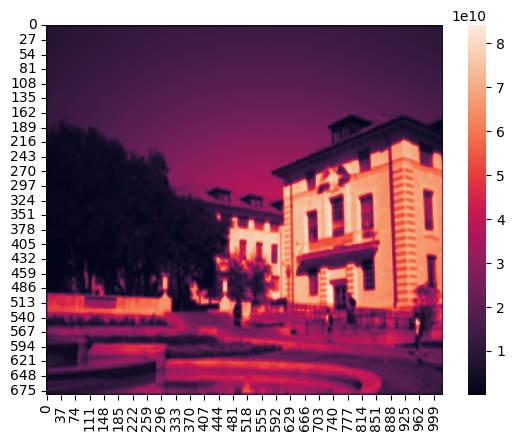

In [8]:
sns.heatmap(response)  # just playing around, this is not my solution image
plt.show()

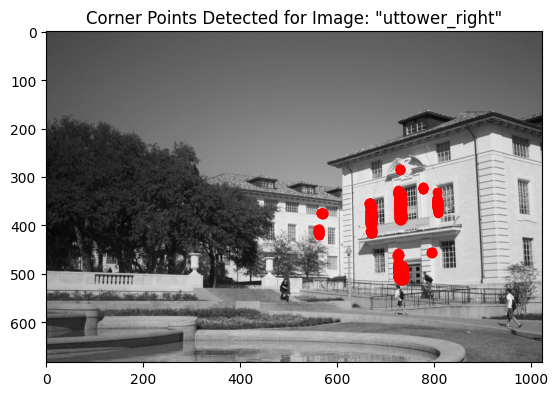

In [12]:
HarrisCornerDetector.execute_and_visualize(
    img1, "uttower_right",
    use_non_max_suppression=False,
)

#### Image 2

In [5]:
img2 = util.load_image(img_paths[1], return_array=True)

Dimensions of ./AlignmentTwoViews/uttower_left.jpg: 683 x 1024


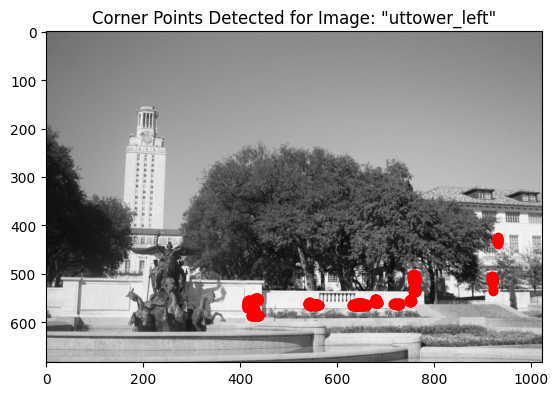

In [17]:
HarrisCornerDetector.execute_and_visualize(
    img2,
    "uttower_left",
    use_non_max_suppression=False,
)

### Part B: Leveraging Non-Maximum Suppression

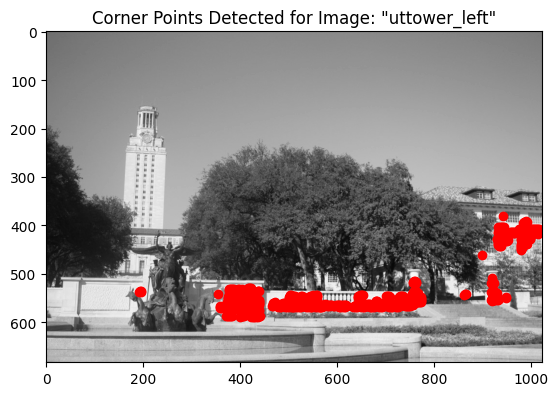

In [6]:
HarrisCornerDetector.execute_and_visualize(
    img2,
    "uttower_left",
    use_non_max_suppression=True,
)

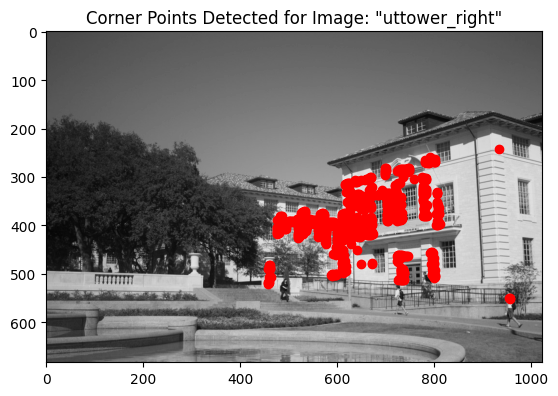

In [9]:
HarrisCornerDetector.execute_and_visualize(
    img1,
    "uttower_right",
    use_non_max_suppression=True,
)